# Prediction Model

# 1. Data and preprocessing

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,"age_bins_(34, 44]","age_bins_(44, 54]","age_bins_(54, 70]",education_1.0,education_2.0,education_3.0,education_4.0,violence_treat_1.0,violence_treat_2.0,violence_treat_3.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
selected_features =['kannabis','alcohol_use',
 'purchase_offer_1',
 'free_offer_1',
 'drug_user_friend_1',
 'age_bins_(24, 34]',
 'single_1',
 'sport',
 'intoxicant_access',
 'no_punishment_1',
 'risk_of_try',
 'nuuska',
 'risk_of_use',
 'cigarette',
 'e_cigarette',
 'prob_country']

data = data[selected_features]
data.head()

,kannabis,alcohol_use,purchase_offer_1,free_offer_1,drug_user_friend_1,"age_bins_(24, 34]",single_1,sport,intoxicant_access,no_punishment_1,risk_of_try,nuuska,risk_of_use,cigarette,e_cigarette,prob_country
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,13.0,1.0,24.0,1.0,1.0,3.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,17.0,1.0,23.0,1.0,1.0,3.0
2,0.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,18.0,1.0,24.0,2.0,1.0,4.0
3,1.0,7.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,0.0,12.0,2.0,22.0,2.0,1.0,3.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,16.0,1.0,24.0,1.0,1.0,3.0


In [4]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.914525
1.0    0.085475
Name: kannabis, dtype: float64

In [5]:
# resample by adding samples to minority class using SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:], data.iloc[:, 0]

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='not majority'))
X_oversamp, Y_over_samp = resample.fit_resample(X, y)



#split data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversamp,
                                                    Y_over_samp,
                                                    test_size=0.3,
                                                    random_state = 10)



print(f"Class counts after resampling {Counter( Y_over_samp)}")

Class counts after resampling Counter({0.0: 2953, 1.0: 2953})


In [6]:
print('Dimension of train data: ', X_train.shape)
print('Dimension of test data: ', X_test.shape)

Dimension of train data:  (4134, 15)
Dimension of test data:  (1772, 15)


In [7]:
# necessary for XGBoost 
#X_train.columns[X_train.columns.str.contains("[\[\]<]")]
X_train.columns = X_train.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

# 2. Model Building with Cross Validation

I will use the main classification models under the hood of sklearn. I will first analyze based on original data set and then apply the same methods on new data set.

In [8]:
# Load libraries
# plot
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import matplotlib.font_manager

#models                   
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier



In [9]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression(max_iter= 1000)))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('ADA'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    basedModels.append(('Bagging'   , BaggingClassifier()))
    basedModels.append(('XGBoost'   , XGBClassifier(eval_metric='mlogloss')))



    
    return basedModels

In [10]:
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [11]:
class PlotBoxR(object):

    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [12]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names,results)

LR: 0.900109 (0.016756)
LDA: 0.897690 (0.020601)
KNN: 0.910981 (0.010083)
CART: 0.942913 (0.008247)
NB: 0.895025 (0.014903)
SVM: 0.910270 (0.016623)
ADA: 0.958155 (0.009427)
GBM: 0.962263 (0.005547)
RF: 0.966374 (0.005254)
ET: 0.969036 (0.006300)
Bagging: 0.957908 (0.006873)
XGBoost: 0.962745 (0.006060)


In [13]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [14]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,LR,0.9001
1,LDA,0.8977
2,KNN,0.9110
3,CART,0.9429
4,NB,0.8950
5,SVM,0.9103
6,ADA,0.9582
7,GBM,0.9623
8,RF,0.9664
9,ET,0.9690


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler =='robust':
        scaler = RobustScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))
    pipelines.append((nameOfScaler+'Bagging', Pipeline([('Scaler', scaler),('Bagging', BaggingClassifier())])))
    pipelines.append((nameOfScaler+'XGBoost', Pipeline([('Scaler', scaler),('Bagging', XGBClassifier(eval_metric='mlogloss'))])))

    return pipelines 

In [16]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.899384 (0.017647)
standardLDA: 0.897690 (0.020601)
standardKNN: 0.935663 (0.012946)
standardCART: 0.944363 (0.007098)
standardNB: 0.895025 (0.014903)
standardSVM: 0.950176 (0.011435)
standardAB: 0.958155 (0.009427)
standardGBM: 0.962263 (0.005547)
standardRF: 0.966374 (0.005476)
standardET: 0.969276 (0.007744)
standardBagging: 0.958874 (0.008328)
standardXGBoost: 0.962745 (0.006060)


,Model,Score,Model,Score
0,LR,0.9001,standardLR,0.8994
1,LDA,0.8977,standardLDA,0.8977
2,KNN,0.9110,standardKNN,0.9357
3,CART,0.9429,standardCART,0.9444
4,NB,0.8950,standardNB,0.8950
5,SVM,0.9103,standardSVM,0.9502
6,ADA,0.9582,standardAB,0.9582
7,GBM,0.9623,standardGBM,0.9623
8,RF,0.9664,standardRF,0.9664
9,ET,0.9690,standardET,0.9693


In [17]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.899626 (0.017715)
minmaxLDA: 0.897690 (0.020601)
minmaxKNN: 0.941714 (0.013255)
minmaxCART: 0.943881 (0.005593)
minmaxNB: 0.895025 (0.014903)
minmaxSVM: 0.943160 (0.010183)
minmaxAB: 0.958155 (0.009427)
minmaxGBM: 0.962263 (0.005547)
minmaxRF: 0.967098 (0.006707)
minmaxET: 0.970972 (0.005077)
minmaxBagging: 0.959844 (0.007675)
minmaxXGBoost: 0.962745 (0.006060)


,Model,Score,Model,Score,Model,Score
0,LR,0.9001,standardLR,0.8994,minmaxLR,0.8996
1,LDA,0.8977,standardLDA,0.8977,minmaxLDA,0.8977
2,KNN,0.9110,standardKNN,0.9357,minmaxKNN,0.9417
3,CART,0.9429,standardCART,0.9444,minmaxCART,0.9439
4,NB,0.8950,standardNB,0.8950,minmaxNB,0.8950
5,SVM,0.9103,standardSVM,0.9502,minmaxSVM,0.9432
6,ADA,0.9582,standardAB,0.9582,minmaxAB,0.9582
7,GBM,0.9623,standardGBM,0.9623,minmaxGBM,0.9623
8,RF,0.9664,standardRF,0.9664,minmaxRF,0.9671
9,ET,0.9690,standardET,0.9693,minmaxET,0.9710


In [18]:
models = GetScaledModel('robust')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

robustLR: 0.900109 (0.017205)
robustLDA: 0.897690 (0.020601)
robustKNN: 0.930823 (0.011887)
robustCART: 0.944604 (0.005473)
robustNB: 0.895025 (0.014903)
robustSVM: 0.940501 (0.013699)
robustAB: 0.958155 (0.009427)
robustGBM: 0.962263 (0.005547)
robustRF: 0.966617 (0.005399)
robustET: 0.969763 (0.004986)
robustBagging: 0.958155 (0.006480)
robustXGBoost: 0.962745 (0.006060)


,Model,Score,Model,Score,Model,Score
0,LR,0.9001,standardLR,0.8994,robustLR,0.9001
1,LDA,0.8977,standardLDA,0.8977,robustLDA,0.8977
2,KNN,0.9110,standardKNN,0.9357,robustKNN,0.9308
3,CART,0.9429,standardCART,0.9444,robustCART,0.9446
4,NB,0.8950,standardNB,0.8950,robustNB,0.8950
5,SVM,0.9103,standardSVM,0.9502,robustSVM,0.9405
6,ADA,0.9582,standardAB,0.9582,robustAB,0.9582
7,GBM,0.9623,standardGBM,0.9623,robustGBM,0.9623
8,RF,0.9664,standardRF,0.9664,robustRF,0.9666
9,ET,0.9690,standardET,0.9693,robustET,0.9698


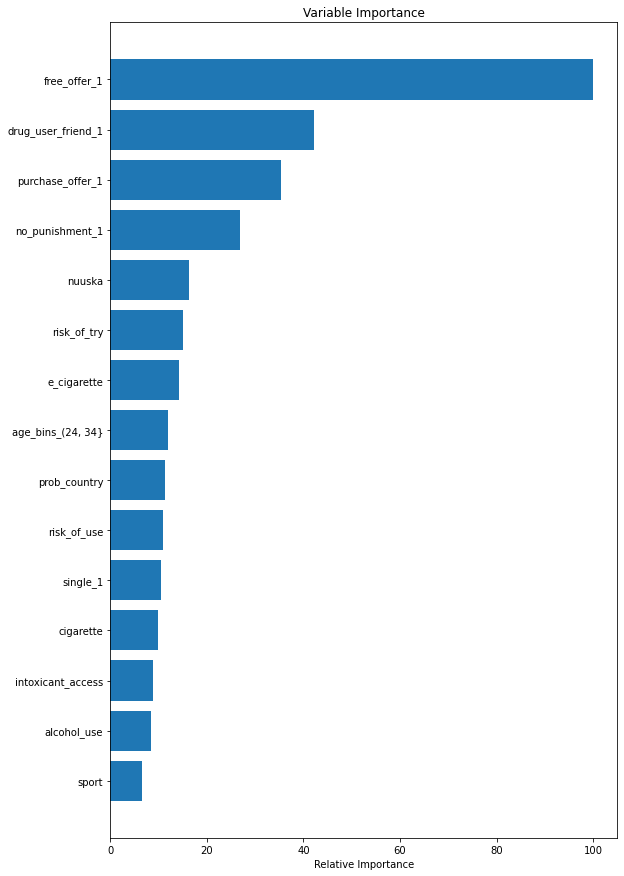

In [19]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)

clf.fit(X_train, y_train)

# #############################################################################
from matplotlib import pyplot as plt

# Plot feature importance
fig = plt.figure(figsize=(20,15))


feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx]) #boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('variable_importance.png')
plt.show()


# 3. Cross-Validation and Hyper Parameters Tuning

In [20]:
def plot_matrics(y_pred):    
    
    #y_pred = pipeline.predict(X_test)
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
    print('Precision:', np.round(metrics.precision_score(y_test, y_pred,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, y_pred,
                                               average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred,
                                               average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, y_pred),4)) 

    from sklearn.metrics import roc_auc_score
    print("roc_auc_score:", roc_auc_score(y_test, y_pred, average=None))

    print('\t\tClassification Report:\n', metrics.classification_report(y_pred,y_test))


    from sklearn.metrics import confusion_matrix
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))


    #Plot Confusion Matrix
    from sklearn.metrics import confusion_matrix
    from io import BytesIO #neded for plot
    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

    mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.savefig("Confusion.jpg")
    # Save SVG in a fake file object.
    f = BytesIO()
    plt.savefig(f, format="svg")

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [22]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
    



In [23]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [24]:
def feature_importance_plot(model):
    # Plot feature importance
    fig = plt.figure(figsize=(15,10))

    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx]) #boston.feature_names[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

## Logistic Regression

C : Regularization value, the more, the stronger the regularization(double).


RegularizationType: Can be either "L2" or “L1”. Default is “L2”.

In [25]:
# model
model = LogisticRegression(max_iter= 1000)
# Create regularization penalty space
penalty = [ 'l2'] # 'l1',

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [26]:
LR_RandSearch = RandomSearch(X_train,y_train, model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test)

Best: 0.901795 using {'C': 0.5201142884731107, 'penalty': 'l2'}


In [27]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [28]:
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_LR).mean(),7))

prediction on test set is: 0.9040632


Accuracy: 0.9041
Precision: 0.9044
Recall: 0.9041
F1 Score: 0.9041
Cohen Kappa Score: 0.8082
Matthews Corrcoef: 0.8084
roc_auc_score: 0.9042988662778843
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       880
         1.0       0.92      0.89      0.90       892

    accuracy                           0.90      1772
   macro avg       0.90      0.90      0.90      1772
weighted avg       0.90      0.90      0.90      1772

Confusion Matrix:
 [[807  97]
 [ 73 795]]


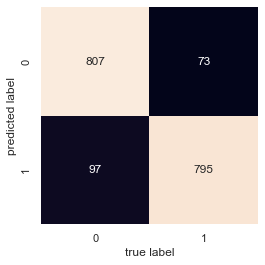

In [29]:
plot_matrics(Prediction_LR)

## KNN

n_neighbors: Number of neighbors to use by default for k_neighbors queries



In [30]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [31]:
KNN_GridSearch = GridSearch(X_train,y_train,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_KNN).mean(),7))

Best: 0.952106 using {'n_neighbors': 2}
prediction on test set is: 0.9576749


Accuracy: 0.9577
Precision: 0.9609
Recall: 0.9577
F1 Score: 0.9576
Cohen Kappa Score: 0.9155
Matthews Corrcoef: 0.9186
roc_auc_score: 0.9584947595938177
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       831
         1.0       1.00      0.92      0.96       941

    accuracy                           0.96      1772
   macro avg       0.96      0.96      0.96      1772
weighted avg       0.96      0.96      0.96      1772

Confusion Matrix:
 [[830  74]
 [  1 867]]


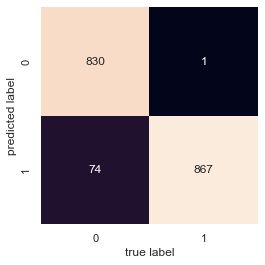

In [32]:
plot_matrics(Prediction_KNN)

## SVC
C: The Penalty parameter C of the error term.

Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [33]:
#c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
c_values = [50, 100, 200]


kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [34]:
SVC_GridSearch = GridSearch(X_train,y_train,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_SVC).mean(),7))

Best: 0.932998 using {'C': 200, 'kernel': 'rbf'}
prediction on test set is: 0.9328442


Accuracy: 0.9328
Precision: 0.9347
Recall: 0.9328
F1 Score: 0.9328
Cohen Kappa Score: 0.8658
Matthews Corrcoef: 0.8676
roc_auc_score: 0.9334702907711757
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       847
         1.0       0.96      0.90      0.93       925

    accuracy                           0.93      1772
   macro avg       0.93      0.93      0.93      1772
weighted avg       0.93      0.93      0.93      1772

Confusion Matrix:
 [[816  88]
 [ 31 837]]


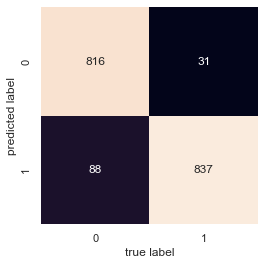

In [35]:
plot_matrics(Prediction_SVC)

## Decision Tree

max_depth: Maximum depth of the tree (double).

row_subsample: Proportion of observations to consider (double).

max_features: Proportion of columns (features) to consider in each level (double).

In [36]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [37]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [38]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train,y_train,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_CART).mean(),7))

Best: 0.948235 using {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}
prediction on test set is: 0.9463883


Accuracy: 0.9464
Precision: 0.9465
Recall: 0.9464
F1 Score: 0.9464
Cohen Kappa Score: 0.8928
Matthews Corrcoef: 0.8928
roc_auc_score: 0.9464922923208678
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       893
         1.0       0.95      0.94      0.95       879

    accuracy                           0.95      1772
   macro avg       0.95      0.95      0.95      1772
weighted avg       0.95      0.95      0.95      1772

Confusion Matrix:
 [[851  53]
 [ 42 826]]


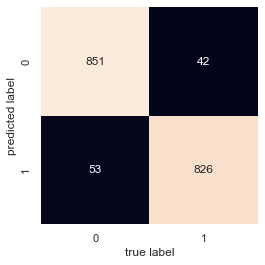

In [39]:
plot_matrics(Prediction_CART)

## AdaBoostClassifier

learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.

n_estimators: Number of trees to build.

In [40]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [41]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train ,y_train, model_Ad, param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_Ad).mean(),7))

Best: 0.963720 using {'learning_rate': 0.5, 'n_estimators': 250}
prediction on test set is: 0.9604966


Accuracy: 0.9605
Precision: 0.9605
Recall: 0.9605
F1 Score: 0.9605
Cohen Kappa Score: 0.921
Matthews Corrcoef: 0.921
roc_auc_score: 0.9604344235553198
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       908
         1.0       0.96      0.96      0.96       864

    accuracy                           0.96      1772
   macro avg       0.96      0.96      0.96      1772
weighted avg       0.96      0.96      0.96      1772

Confusion Matrix:
 [[871  33]
 [ 37 831]]


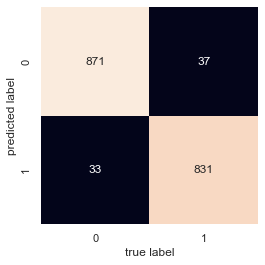

In [42]:
plot_matrics(Prediction_Ad)

# GradientBoosting

In [43]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [44]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train,y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.963958 using {'learning_rate': 0.5, 'n_estimators': 50}
prediction on test set is: 0.9559819


Accuracy: 0.956
Precision: 0.956
Recall: 0.956
F1 Score: 0.956
Cohen Kappa Score: 0.9119
Matthews Corrcoef: 0.912
roc_auc_score: 0.955849068145671
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       914
         1.0       0.95      0.96      0.95       858

    accuracy                           0.96      1772
   macro avg       0.96      0.96      0.96      1772
weighted avg       0.96      0.96      0.96      1772

Confusion Matrix:
 [[870  34]
 [ 44 824]]


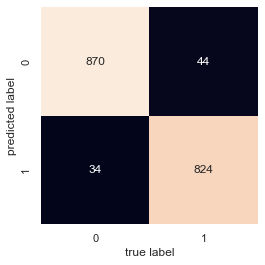

In [45]:
plot_matrics(Prediction_GB)

## Extra tree

In [46]:
n_estimators= [10, 50, 100, 500, 1000]
criterion = ["gini", "entropy"]
max_depth = [ 10, 15, 20]
param_grid = dict(n_estimators=n_estimators_value,
                  criterion = criterion,
                  max_depth = max_depth  
                 )

In [47]:
model_ET = ExtraTreesClassifier()
ET_GridSearch = GridSearch(X_train,y_train,model_ET,param_grid)
Prediction_ET = ET_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_GB).mean(),7))

Best: 0.970252 using {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
prediction on test set is: 0.9559819


Accuracy: 0.9729
Precision: 0.973
Recall: 0.9729
F1 Score: 0.9729
Cohen Kappa Score: 0.9458
Matthews Corrcoef: 0.9459
roc_auc_score: 0.9729925370090942
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       896
         1.0       0.98      0.97      0.97       876

    accuracy                           0.97      1772
   macro avg       0.97      0.97      0.97      1772
weighted avg       0.97      0.97      0.97      1772

Confusion Matrix:
 [[876  28]
 [ 20 848]]


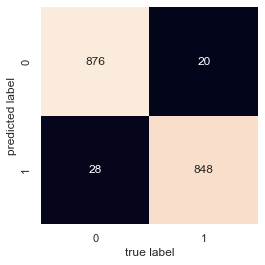

In [48]:
plot_matrics(Prediction_ET)

# XGBoost

In [49]:
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'colsample_bytree': [0.3, 0.7]
}



In [50]:
model_XGB = XGBClassifier(eval_metric='mlogloss', use_label_encoder =False, objective= 'binary:logistic',
    nthread=4,
    seed=42)
GB_GridSearch = GridSearch(X_train,y_train,model_XGB, param_grid)
Prediction_XGB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_XGB).mean(),7))

Best: 0.970248 using {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
prediction on test set is: 0.9683973


Accuracy: 0.9684
Precision: 0.9685
Recall: 0.9684
F1 Score: 0.9684
Cohen Kappa Score: 0.9368
Matthews Corrcoef: 0.9368
roc_auc_score: 0.9682466049508585
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       916
           1       0.96      0.97      0.97       856

    accuracy                           0.97      1772
   macro avg       0.97      0.97      0.97      1772
weighted avg       0.97      0.97      0.97      1772

Confusion Matrix:
 [[882  22]
 [ 34 834]]


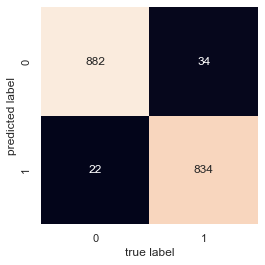

In [51]:
plot_matrics(Prediction_XGB)

## Bagging

In [52]:

n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];



param_grid = {'n_estimators':n_estimators,
              'base_estimator__max_leaf_nodes':[10, 15],
              'base_estimator__max_depth':[4, 5, 6]
              
              
        }
dt = DecisionTreeClassifier()
final_dt = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5)                   





In [53]:
## If None, then the base estimator is a decision tree.
#model_bagging = BaggingClassifier(base_estimator= None, bootstrap_features=False)

model_bagging = BaggingClassifier(base_estimator=final_dt, random_state=1)


bagging_GridSearch = GridSearch(X_train,y_train,model_bagging, param_grid)
Prediction_bagging = bagging_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_XGB).mean(),7))

Best: 0.949205 using {'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 10}
prediction on test set is: 0.9683973


Accuracy: 0.9481
Precision: 0.9481
Recall: 0.9481
F1 Score: 0.9481
Cohen Kappa Score: 0.8961
Matthews Corrcoef: 0.8962
roc_auc_score: 0.9481515843562661
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       896
         1.0       0.95      0.94      0.95       876

    accuracy                           0.95      1772
   macro avg       0.95      0.95      0.95      1772
weighted avg       0.95      0.95      0.95      1772

Confusion Matrix:
 [[854  50]
 [ 42 826]]


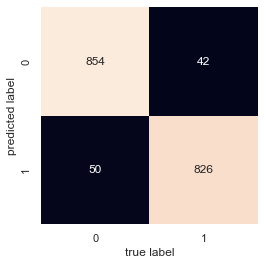

In [54]:
plot_matrics(Prediction_bagging)

# Ensemble Methods

## Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
#param = {'C': 0.7678243129497218, 'penalty': 'l1'}
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

param=  {'max_depth': randint(2, 5),'min_samples_split': randint(5, 20), 'min_samples_leaf': randint(10, 20),
     'n_estimators': randint(50, 100),
     'max_features': uniform(0.6, 0.3)
    }
model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

model10 = BaggingClassifier()

param = {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.8,'max_depth':6, 'colsample_bytree': 1, 'gamma':1}
model11 = XGBClassifier(eval_metric='mlogloss')

In [57]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9),
              ('Bagging',model10), ('XGB',model11)
             ]
    

In [58]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train,y_train, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train,y_train)
pred = ensemble_model.predict(X_test)
print('Accuracy on test:' , (y_test == pred).mean())

Accuracy on train:  0.9492075189201202
Accuracy on test: 0.95372460496614


## Beyond Voting

In [59]:
def get_models():
    """Generate a library of base learners."""
    #param = {'C': 0.7678243129497218, 'penalty': 'l1'}
    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()
    model10 = BaggingClassifier()

    param = {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.8,'max_depth':6, 'colsample_bytree': 1, 'gamma':1}
    model11 = XGBClassifier(eval_metric='mlogloss')

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9,
              'Bagging':model10, 'XGB':model11
              }

    return models

## Error Corrolation

In [60]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [61]:
models = get_models()
P = train_predict(models,X_train,X_test,y_train,y_test)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Bagging... done
XGB... done
Done.



[MLENS] backend: threading


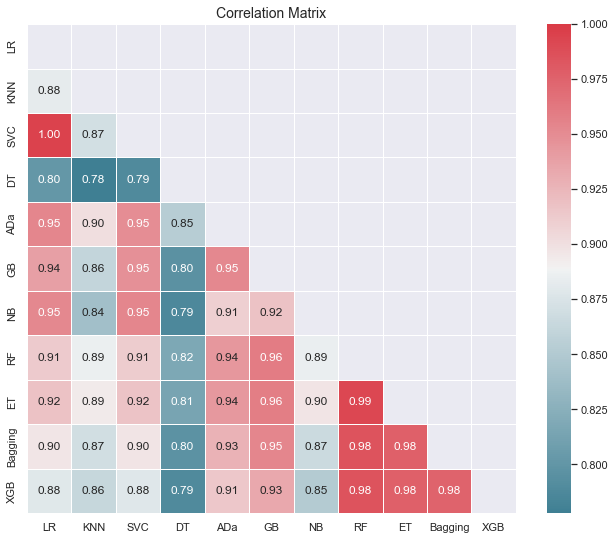

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [62]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)

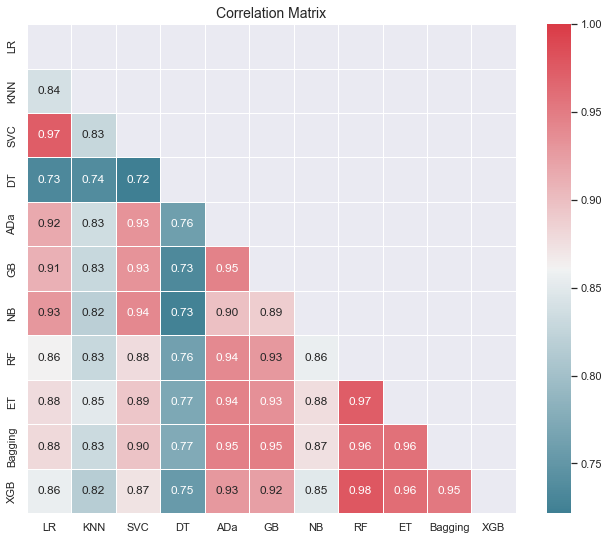

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [63]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test).corr(), inflate=False)

# Stacking

In [64]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=42
)

In [65]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=42,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train, y_train)

# Predict the test set
p_sl = sl.predict_proba(X_test)

# print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             done | 00:00:12
Processing layer-2             done | 00:00:02
Fit complete                        | 00:00:15

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


In [66]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [67]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test== pp).mean())



Super Learner Accuracy score: 0.97629797


In [68]:
# summarize base learners
print(sl.data)




                                       ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier            0.80  0.00  0.04  0.01
layer-1  baggingclassifier             0.12  0.02  0.00  0.00
layer-1  decisiontreeclassifier        0.00  0.00  0.00  0.00
layer-1  extratreesclassifier          0.31  0.01  0.02  0.00
layer-1  gaussiannb                    0.00  0.00  0.00  0.00
layer-1  gradientboostingclassifier    0.70  0.00  0.00  0.00
layer-1  kneighborsclassifier          0.01  0.00  0.02  0.00
layer-1  logisticregression            0.21  0.04  0.00  0.00
layer-1  randomforestclassifier        0.46  0.02  0.02  0.00
layer-1  svc                           4.12  0.24  0.02  0.00
layer-1  xgbclassifier                 2.99  0.16  0.00  0.00



# Summary

- Our results show that extratree, XGB and Random Forest models produce satisfactor results for our study design. 
- We can also test NN models but since the sample size is small, we are not exptecting a considerable improvement. 
- I also create visialization map for decision tree, if you are interested in, you can check it out. 






Reference for [codes](https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86/notebook)